In [51]:
%pip install iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import expon, norm, chi2
import numpy as np 
import matplotlib.pyplot as plt



Note: you may need to restart the kernel to use updated packages.


# Vari appunti - prova esame 24/06 


In [52]:
N_eventi_exp = 2000
lambda_exp = 1/200
N_eventi_gauss = 200
mu_gau = 190 
sigma_gau = 20


#genero i campioni
np.random.seed(42)
dati_exp = np.random.exponential(1/lambda_exp, N_eventi_exp)
dati_gauss = np.random.normal(mu_gau, sigma_gau, N_eventi_gauss)

dati_combinati = np.concatenate((dati_exp, dati_gauss))


In [53]:
def sturges(sample:list)->int:
    return int(np.ceil(1+3.322 * np.log(len(sample))))

# Disegno plot

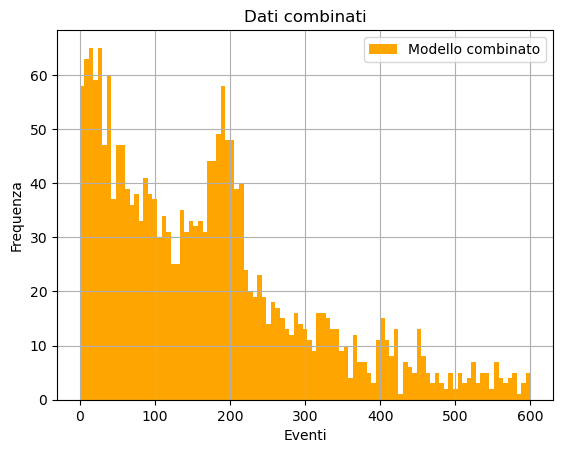

In [54]:

N_bins = sturges(dati_combinati)
bins = np.linspace(np.floor(min(dati_combinati)), 3*(1/lambda_exp),100)

plt.hist (dati_combinati, bins=bins, color = 'orange' , label = 'Modello combinato')
plt.xlabel('Eventi')
plt.ylabel('Frequenza')
plt.title('Dati combinati')
plt.legend()
plt.grid()
plt.show()


In [60]:
# Fit modello 

from iminuit import Minuit
from scipy.stats import expon, norm, chi2   
from iminuit.cost import ExtendedBinnedNLL

def modello (bin_edges, N_signal, mu,sigma, N_background, tau):
    return N_signal * norm.cdf(bin_edges,mu,sigma) + N_background * expon.cdf(bin_edges,0,tau)


N_events = sum(bin_content)
media_dati = np.mean(dati_combinati)
std_dati = np.std(dati_combinati)
bin_content, bin_edges = np.histogram(dati_combinati, bins = N_bins , range = (0, 3*200.))

my_cost_func = ExtendedBinnedNLL(bin_content,bin_edges,modello)

m = Minuit(my_cost_func, N_signal = N_events, mu = media_dati, sigma = std_dati, N_background = N_events, tau = 1/lambda_exp)
m.migrad()
m.hesse()
display(m)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 32.64 (χ²/ndof = 1.5)      │              Nfcn = 802              │
│ EDM = 8.43e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │    218    │    27     │            │            │         │         │       │
│ 1 │ mu           │   193.1   │    2.4    │            │            │         │         │       │
│ 2 │ sigma        │   17.5    │    2.7    │            │            │         │         │       │
│ 3 │ N_background │  1.97e3   │  0.05e3   │            │            │         │         │       │
│ 4 │ tau          │    198    │     6     │            │            │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │          733           -8           38       -0.6e3          -10 │
│           mu │           -8         6.03           -1            7           -1 │
│        sigma │           38           -1         7.33          -41           -1 │
│ N_background │       -0.6e3            7          -41     2.78e+03           80 │
│          tau │          -10           -1           -1           80         41.4 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

# Costruisco una funzione che calcola la loglikelihood associata al sample
# dato il seguente modello

In [ ]:
tau = m.values['tau']
lambda_exp = 1/tau
sigma = m.values['sigma']
gau_norm = 1/ (np.sqrt(2*np.pi)*sigma)

